In [1]:
import numpy as np
from math import cos, sin, pi, radians, sqrt
from scipy.special import fresnel
import matplotlib.pyplot as plt



In [2]:

def spiral_interp_centre(distance, x, y, hdg, length, curvEnd):
    '''Interpolate for a spiral centred on the origin'''
    # s doesn't seem to be needed...
    theta = hdg                    # Angle of the start of the curve
    Ltot = length                  # Length of curve
    Rend = 1 / curvEnd             # Radius of curvature at end of spiral

    # Rescale, compute and unscale
    a = 1 / sqrt(2 * Ltot * Rend)  # Scale factor
    distance_scaled = distance * a # Distance along normalised spiral
    deltay_scaled, deltax_scaled = fresnel(distance_scaled)
    deltax = deltax_scaled / a
    deltay = deltay_scaled / a

    # deltax and deltay give coordinates for theta=0
    deltax_rot = deltax * cos(theta) - deltay * sin(theta)
    deltay_rot = deltax * sin(theta) + deltay * cos(theta)

    # Spiral is relative to the starting coordinates
    xcoord = x + deltax_rot
    ycoord = y + deltay_rot

    return xcoord, ycoord


[0.0, 0.9999999999812097, 1.9999999993987094, 2.999999995433949, 3.999999980758699, 4.9999999412802065, 5.999999853886365, 6.999999684190862, 7.999999384278361, 8.999998890449636, 9.999998120966772, 10.99999697379832, 11.999995324364473, 12.999993023282284, 13.999989894110827, 14.999985731096462, 15.999980296918054, 16.99997332043224, 17.999964494418744, 18.999953473325718, 19.999939871015155, 20.999923258508286, 21.99990316173117, 22.999879059260238, 23.999850380068008, 24.99981650126889, 25.99977674586506, 26.999730380492586, 27.99967661316758, 28.999614591032586, 29.999543398103174, 30.999462053014746, 31.999369506769533, 32.999264640483936, 33.99914626313613, 34.99901310931396, 35.998863836963196, 36.99869702513629, 37.99851117174139, 38.99830469129194, 39.99807591265669, 40.99782307681033, 41.99754433458467, 42.997237744420445, 43.99690127011987, 44.996532778599764, 45.99613003764567, 46.99569071366668, 47.99521236945121, 48.99469246192368, 49.99412833990236, 50.99351724185811, 51

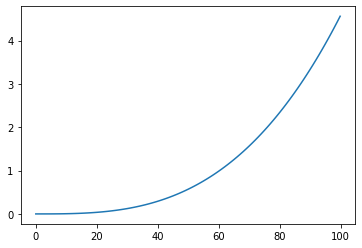

In [3]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# This version
startX=0
startY=0
curvStart = radians(0) # 0 when coming out of a straight line
curvEnd = radians(0.01) # non 0 when going into an arc
length = 10
xs = []
ys = []
for n in range(0, 100+1):
    x, y = spiral_interp_centre(n, startX, startY, curvStart, length, curvEnd)
    xs.append(x)
    ys.append(y)
ax.plot(xs, ys)

print(xs)
